In [1]:
import numpy as np
from math import *
from copy import deepcopy
from qiskit import *
from qiskit.visualization import plot_state_paulivec
import matplotlib.pyplot as plt

***Exercise 6.7-6.8:***

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Next, Charlie prepares the spins in different triplet states:

$\ket{T_{1}} = \frac{1}{\sqrt{2}}({\ket{01} + \ket{10}})$

$\ket{T_{2}} = \frac{1}{\sqrt{2}}({\ket{11} - \ket{00}})$

$\ket{T_{3}} =\frac{1}{\sqrt{2}}({\ket{11} + \ket{00}})$

In these examples, T stands for triplet. These triplet states
are completely different from the states in the coin and die
examples. What are the expectation values of the operators
$σ_{z}τ_{z}$, $σ_{x}τ_{x}$, and $ σ_{y}τ_{y}$?


In [2]:
#Helper function to find state
def getStateVector(circ):
    result = execute(circ, backend = BasicAer.get_backend('statevector_simulator')).result()
    psi = result.get_statevector(circ)
    return psi

In [3]:
#Prepare the triplet states
q = QuantumRegister(2)
c = ClassicalRegister(2)

T1 = QuantumCircuit(q,c)
T1.x(0)
T1.ry(pi/2,1)
T1.cx(q[1],q[0])
print('T1 State-Vec:' , getStateVector(T1))

T2 = QuantumCircuit(q,c)
T2.ry(-pi/2, 0)
T2.cx(q[0] , q[1])
print('T2 State-Vec:' , getStateVector(T2))

T3 = QuantumCircuit(q,c)
T3.ry(pi/2,0)
T3.cx(q[0] , q[1])
print('T3 State-Vec:' , getStateVector(T3))

T1 State-Vec: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
T2 State-Vec: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
T3 State-Vec: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$

The function below takes the circuit, applies the corresponding gates to it, and calculates the expectation values of the operators by taking the inner product as follows:
$$\bra{T_{i}}\sigma_{z}\tau_{z}\ket{T_{i}}$$
$$\bra{T_{i}}\sigma_{x}\tau_{x}\ket{T_{i}}$$
$$\bra{T_{i}}\sigma_{y}\tau_{y}\ket{T_{i}}$$

In [4]:
def getExpectValue(circ):
    psi = getStateVector(circ)

    circZ = deepcopy(circ)
    circZ.z(0)
    circZ.z(1)
    
    circX = deepcopy(circ)
    circX.x(0)
    circX.x(1)

    circY = deepcopy(circ)
    circY.y(0)
    circY.y(1)
    
    print('Expectation Value Z:', (np.transpose(psi)@getStateVector(circZ)).round(1))
    print('Expectation Value X:', (np.transpose(psi)@getStateVector(circX)).round(1))
    print('Expectation Value Y:', (np.transpose(psi)@getStateVector(circY)).round(1))

    
print('Triplet State 1:')
getExpectValue(T1)
print('Triplet State 2:') 
getExpectValue(T2)
print('Triplet State 3:')
getExpectValue(T3)


Triplet State 1:
Expectation Value Z: (-1+0j)
Expectation Value X: (1+0j)
Expectation Value Y: (1+0j)
Triplet State 2:
Expectation Value Z: (1+0j)
Expectation Value X: (-1+0j)
Expectation Value Y: (1+0j)
Triplet State 3:
Expectation Value Z: (1+0j)
Expectation Value X: (1+0j)
Expectation Value Y: (-1+0j)


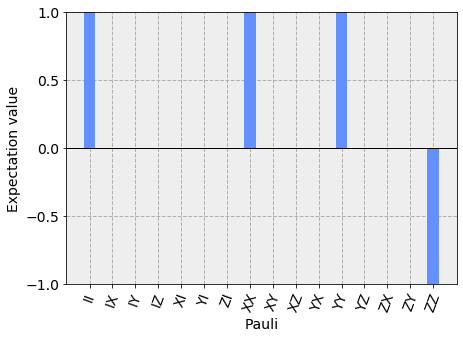

In [5]:
#Pauli State Vector for Triplet 1
plot_state_paulivec(getStateVector(T1))

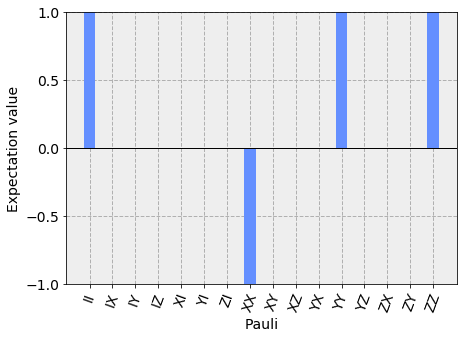

In [6]:
#Pauli State Vector for Triplet 2
plot_state_paulivec(getStateVector(T2))

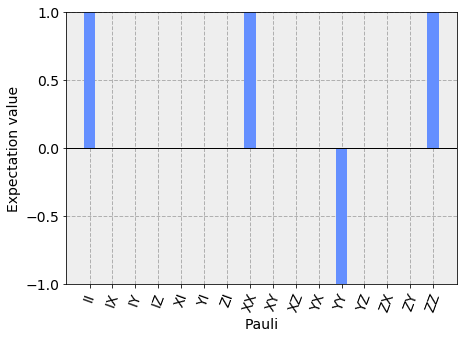

In [7]:
#Pauli State Vector for Triplet 3
plot_state_paulivec(getStateVector(T3))